In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp20-csestat-416-hw-5/seattle_rain_test.csv
/kaggle/input/sp20-csestat-416-hw-5/seattle_rain_train.csv
/kaggle/input/sp20-csestat-416-hw-5/baseline_submission.csv


# PATH
* Data split : train: 0.7, validation : 0.15, test : 0.15
* model selection : 1. decision tree 2. logistic regression 3. KNneighbors
* parameter choosing : use validation_data to find most fit parameter of each method
* evaludation : use test data to find model that fits the most.

In [71]:
# import and split data
from sklearn.model_selection import train_test_split
rain_data = pd.read_csv('/kaggle/input/sp20-csestat-416-hw-5/seattle_rain_train.csv')
rain_final_test = pd.read_csv('/kaggle/input/sp20-csestat-416-hw-5/seattle_rain_test.csv')
rain_test_validation, rain_train = train_test_split(rain_data, test_size = 0.3, random_state = 1) 
rain_validation, rain_test = train_test_split(rain_test_validation, test_size = 0.5, random_state = 1) 
for col in rain_final_features.columns: 
    print(col)


Id
PRCP
TMAX
TMIN
RAIN
TMIDR
TRANGE
MONTH
SEASON
YEST_RAIN
YEST_PRCP
SUM7_PRCP
SUM14_PRCP
SUM30_PRCP


In [72]:
# split feature
features = [
    'PRCP',
    'TMAX',
    'TMIN',
    'RAIN',
    'TMIDR',
    'TRANGE',
    'MONTH',
    'SEASON',
    'YEST_RAIN',
    'YEST_PRCP',
    'SUM7_PRCP',
    'SUM14_PRCP',
    'SUM30_PRCP',
];

target = 'TMRW_RAIN';

# MODEL TRAINING
* random forest : using a list of depth and grid search to find the depth that is most suitable
* logistic regression : use a list a lambda and validation data to find the most suitable

In [73]:
# use gridsearch to find the best leaf and depth for random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV
min_samples_leaf = [1, 10, 50, 100, 200, 300];
max_depth = [1, 5, 10, 15, 20];
hyperparameters = {'min_samples_leaf' : min_samples_leaf, 'max_depth' : max_depth, };
search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparameters, cv = 6, return_train_score = True)
search.fit(rain_train[features], rain_train[target])
print(search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 10}


In [74]:
# fit the data
random_forest_model = RandomForestClassifier(max_depth = 5, min_samples_leaf = 100);
random_forest_model.fit(rain_train[features], rain_train[target])
print(accuracy_score(rain_validation['TMRW_RAIN'], random_forest_model.predict(rain_validation[features])))

0.7179448546029833


In [75]:
from sklearn.linear_model import LogisticRegression
# [1, 4, 10, 1e2, 1e3, 1e5]
# sentiment_model = LogisticRegression(penalty='l2', random_state = 1, C = 1e23)
l2_penalty = [1, 4, 10, 1e2, 1e3, 1e5, 1e23]
max_score = 0
penalty = 1;
for x in l2_penalty :
    logistic_model = LogisticRegression(penalty = 'l2', random_state = 1, C = x)
    logistic_model.fit(rain_train[features], rain_train[target])
    score = accuracy_score(rain_validation['TMRW_RAIN'], logistic_model.predict(rain_validation[features]))
    if max_score < score :
         max_score = score
         penalty = x
        
print(score)       
logistic_model = LogisticRegression(penalty = 'l2', random_state = 1, C = penalty)
logistic_model.fit(rain_train[features], rain_train[target])
print(accuracy_score(rain_validation['TMRW_RAIN'], logistic_model.predict(rain_validation[features])))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7114660238059364
0.7125207171915022


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [76]:
# kneighbor
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors = 200)
kn_model.fit(rain_train[features], rain_train[target])
print(accuracy_score(rain_validation['TMRW_RAIN'], kn_model.predict(rain_validation[features])))

0.6820852794937472


In [77]:
# testing result
from sklearn.metrics import accuracy_score
print(accuracy_score(rain_test['TMRW_RAIN'], random_forest_model.predict(rain_test[features])))
print(accuracy_score(rain_test['TMRW_RAIN'], logistic_model.predict(rain_test[features])))
print(accuracy_score(rain_test['TMRW_RAIN'], kn_model.predict(rain_test[features])))

0.7132740696097635
0.7075485912309778
0.6740997438601778


In [78]:
prediction = random_forest_model.predict(rain_final_test[features])
print(prediction)

[0. 1. 1. ... 0. 0. 1.]


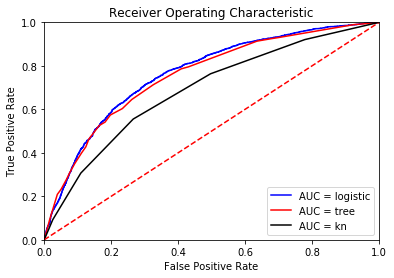

In [79]:
# plot three curve
from sklearn import metrics
logistic_probs = logistic_regression_model.predict_proba(rain_validation[features])
logistic_preds = logistic_probs[:,1]
logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(rain_validation['TMRW_RAIN'], logistic_preds)
logistic_roc_auc = metrics.auc(logistic_fpr, logistic_tpr)

tree_probs = decision_tree_model.predict_proba(rain_validation[features])
tree_preds = tree_probs[:,1]
tree_fpr, tree_tpr, tree_threshold = metrics.roc_curve(rain_validation['TMRW_RAIN'], tree_preds)
tree_roc_auc = metrics.auc(tree_fpr, tree_tpr)

kn_probs = KNeighbors_model.predict_proba(rain_validation[features])
kn_preds = kn_probs[:,1]
kn_fpr, kn_tpr, kn_threshold = metrics.roc_curve(rain_validation['TMRW_RAIN'], kn_preds)
kn_roc_auc = metrics.auc(kn_fpr, kn_tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(logistic_fpr, logistic_tpr, 'b', label = 'AUC = logistic' % logistic_roc_auc)
plt.plot(tree_fpr, tree_tpr, 'r', label = 'AUC = tree' % tree_roc_auc)
plt.plot(kn_fpr, kn_tpr, 'k', label = 'AUC = kn' % kn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()